In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/juliazh1307/Parkinson-s-Data/main/parkinsons_disease_data.csv', index_col = 0)
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
PatientID,,,,,,,,,,,,,,,,,,,,,
3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


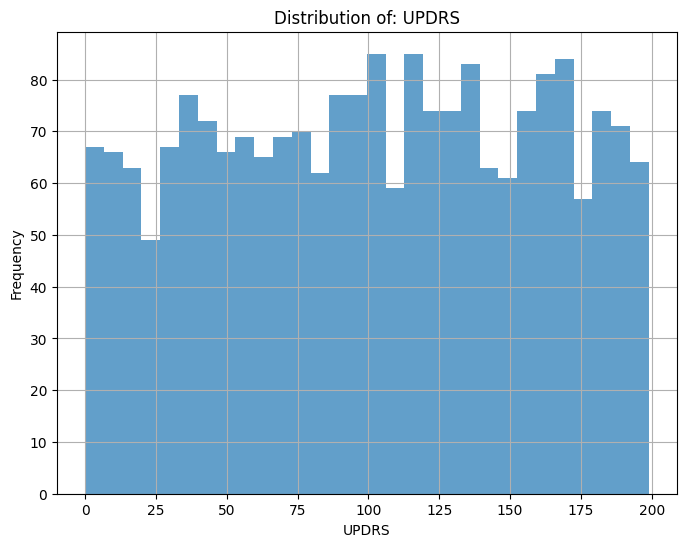

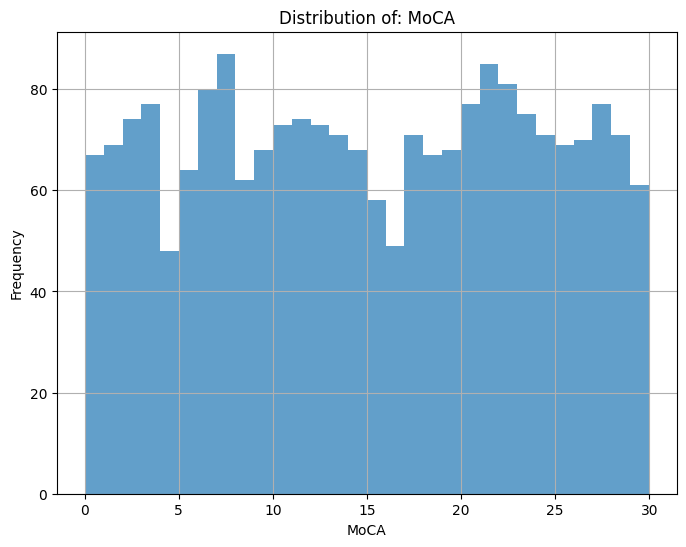

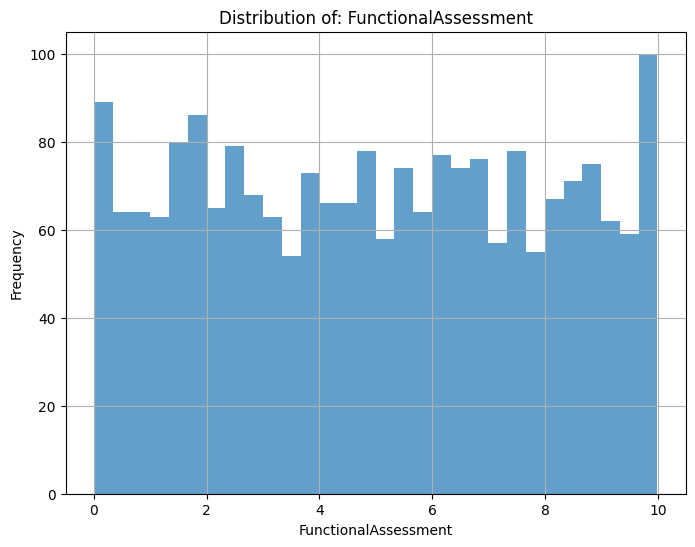

In [3]:
numeric_features = ['UPDRS', 'MoCA', 'FunctionalAssessment']

for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=30, alpha=0.7)
    plt.title('Distribution of: ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [4]:
df[numeric_features].describe()

,UPDRS,MoCA,FunctionalAssessment
count,2105.000000,2105.000000,2105.000000
mean,101.415318,15.094314,4.989694
std,56.591448,8.643014,2.933877
min,0.028441,0.021191,0.001505
25%,53.048148,7.517160,2.415890
50%,102.561023,14.963574,4.983227
75%,149.831682,22.608362,7.484220
max,198.953604,29.970107,9.992697


The numerical distributions are pretty uniform, which can be seen looking at the histograms, the mean and min/max values.

<Figure size 800x400 with 0 Axes>

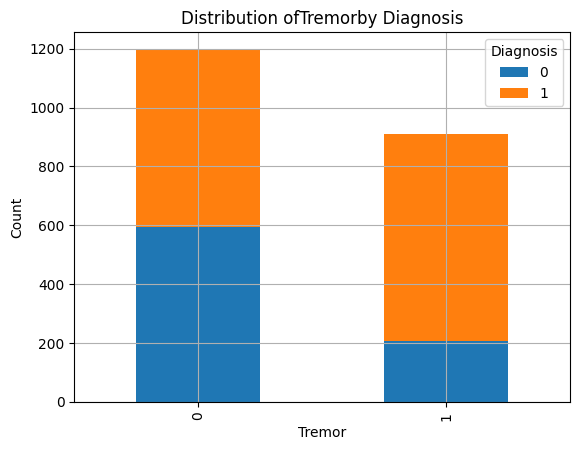

<Figure size 800x400 with 0 Axes>

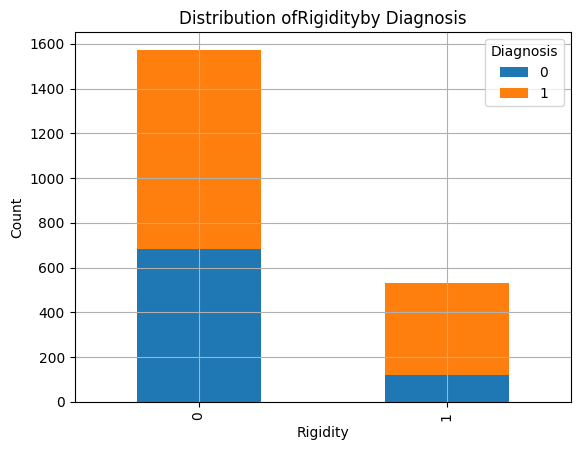

<Figure size 800x400 with 0 Axes>

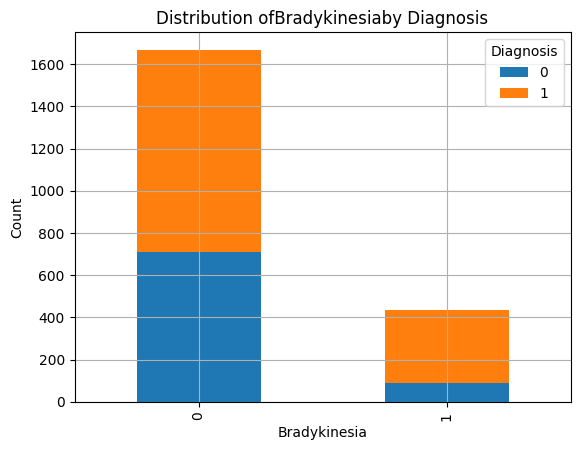

<Figure size 800x400 with 0 Axes>

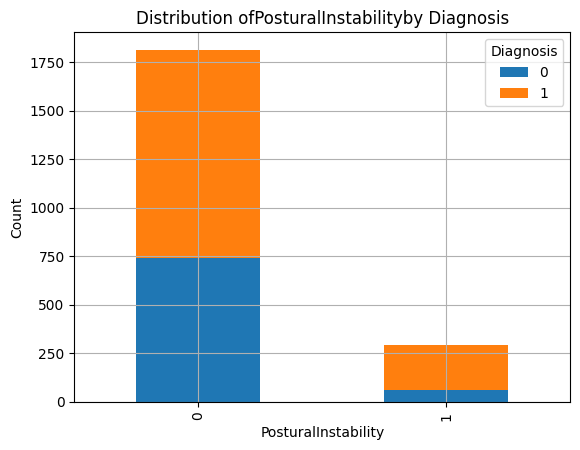

<Figure size 800x400 with 0 Axes>

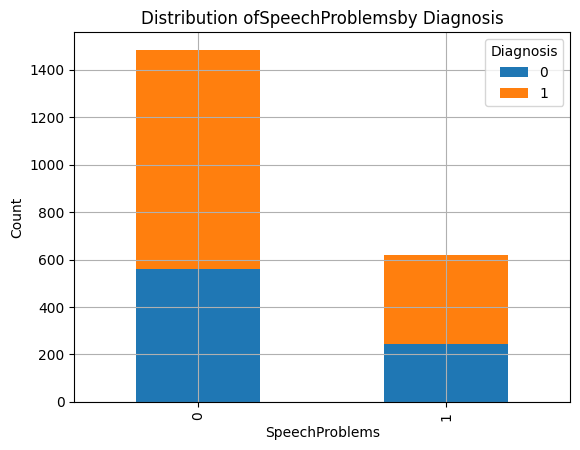

<Figure size 800x400 with 0 Axes>

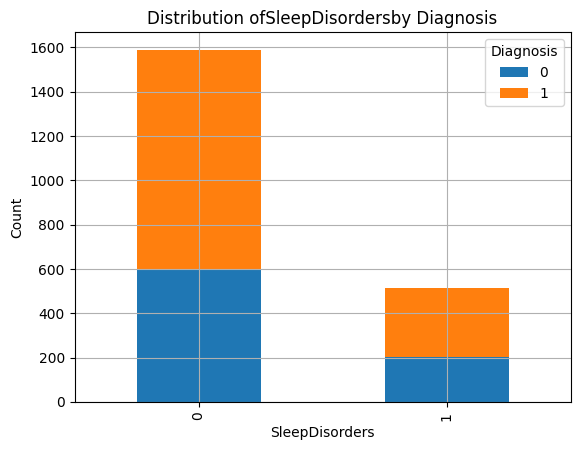

<Figure size 800x400 with 0 Axes>

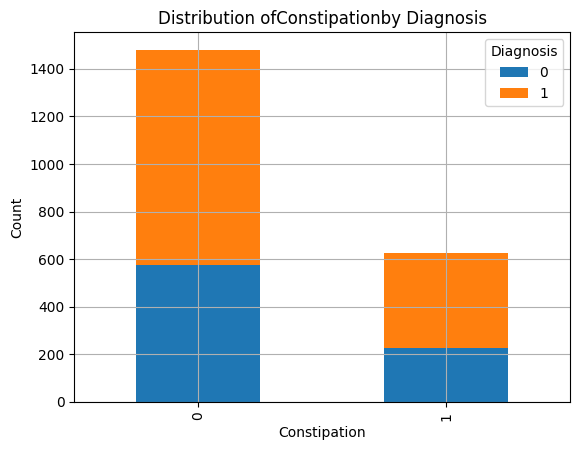

In [5]:
categorical_features = ['Tremor', 'Rigidity', 'Bradykinesia',
                        'PosturalInstability', 'SpeechProblems',
                        'SleepDisorders', 'Constipation']

for feature in categorical_features:
  plt.figure(figsize=(8, 4))
  df.groupby([feature, 'Diagnosis']).size().unstack().plot(kind='bar', stacked=True)
  plt.title('Distribution of' + feature + 'by Diagnosis')
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.grid(True)
  plt.show()

In [6]:
df[categorical_features].describe()

,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912
std,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df[categorical_features].corr()

,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
Tremor,1.000000,0.011624,0.000687,-0.055755,-0.006658,0.027148,0.010720
Rigidity,0.011624,1.000000,-0.041624,0.016453,-0.009459,0.026913,0.026420
Bradykinesia,0.000687,-0.041624,1.000000,0.021621,0.018183,0.021451,0.021148
PosturalInstability,-0.055755,0.016453,0.021621,1.000000,-0.021528,-0.024212,0.027980
SpeechProblems,-0.006658,-0.009459,0.018183,-0.021528,1.000000,0.006717,-0.014551
SleepDisorders,0.027148,0.026913,0.021451,-0.024212,0.006717,1.000000,0.009169
Constipation,0.010720,0.026420,0.021148,0.027980,-0.014551,0.009169,1.000000


This independence ensures that each feature contributes uniquely to the analysis without overlap.

In [8]:
# @markdown Run this cell to download this notebook as a webpage, `_NOTEBOOK.html`.

import google, json, nbformat

# Get the current notebook and write it to _NOTEBOOK.ipynb
raw_notebook = google.colab._message.blocking_request("get_ipynb",
                                                      timeout_sec=30)["ipynb"]
with open("_NOTEBOOK.ipynb", "w", encoding="utf-8") as ipynb_file:
  ipynb_file.write(json.dumps(raw_notebook))

# Use nbconvert to convert .ipynb to .html.
!jupyter nbconvert --to html --log-level WARN _NOTEBOOK.ipynb

# Download the .html file.
google.colab.files.download("_NOTEBOOK.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>